<a href="https://colab.research.google.com/github/Chpel/CoDA-Project/blob/main/Wine.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Imports

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error
from sklearn.preprocessing import StandardScaler, MinMaxScaler, KBinsDiscretizer
from sklearn.cluster import KMeans
from scipy.stats import bootstrap

In [ ]:
!pip install ucimlrepo

In [ ]:
from ucimlrepo import fetch_ucirepo

# fetch dataset
wine = fetch_ucirepo(id=109)

# data (as pandas dataframes)
X = wine.data.features
y = wine.data.targets

# metadata
print(wine.metadata)

# variable information
print(wine.variables)

{'uci_id': 109, 'name': 'Wine', 'repository_url': 'https://archive.ics.uci.edu/dataset/109/wine', 'data_url': 'https://archive.ics.uci.edu/static/public/109/data.csv', 'abstract': 'Using chemical analysis to determine the origin of wines', 'area': 'Physics and Chemistry', 'tasks': ['Classification'], 'characteristics': ['Tabular'], 'num_instances': 178, 'num_features': 13, 'feature_types': ['Integer', 'Real'], 'demographics': [], 'target_col': ['class'], 'index_col': None, 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 1992, 'last_updated': 'Mon Aug 28 2023', 'dataset_doi': '10.24432/C5PC7J', 'creators': ['Stefan Aeberhard', 'M. Forina'], 'intro_paper': {'title': 'Comparative analysis of statistical pattern recognition methods in high dimensional settings', 'authors': 'S. Aeberhard, D. Coomans, O. Vel', 'published_in': 'Pattern Recognition', 'year': 1994, 'url': 'https://www.semanticscholar.org/paper/83dc3e4030d7b9fbdbb4bde03ce12ab70ca10528', 'do

In [ ]:
X

,Alcohol,Malicacid,Ash,Alcalinity_of_ash,Magnesium,Total_phenols,Flavanoids,Nonflavanoid_phenols,Proanthocyanins,Color_intensity,Hue,0D280_0D315_of_diluted_wines,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
174,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
175,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
176,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


In [ ]:
X.describe().drop(['count', '25%','50%','75%'], axis=0)

,Alcohol,Malicacid,Ash,Alcalinity_of_ash,Magnesium,Total_phenols,Flavanoids,Nonflavanoid_phenols,Proanthocyanins,Color_intensity,Hue,0D280_0D315_of_diluted_wines,Proline
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


# Homework 1 (Correlation)


## Task 1

<Axes: >

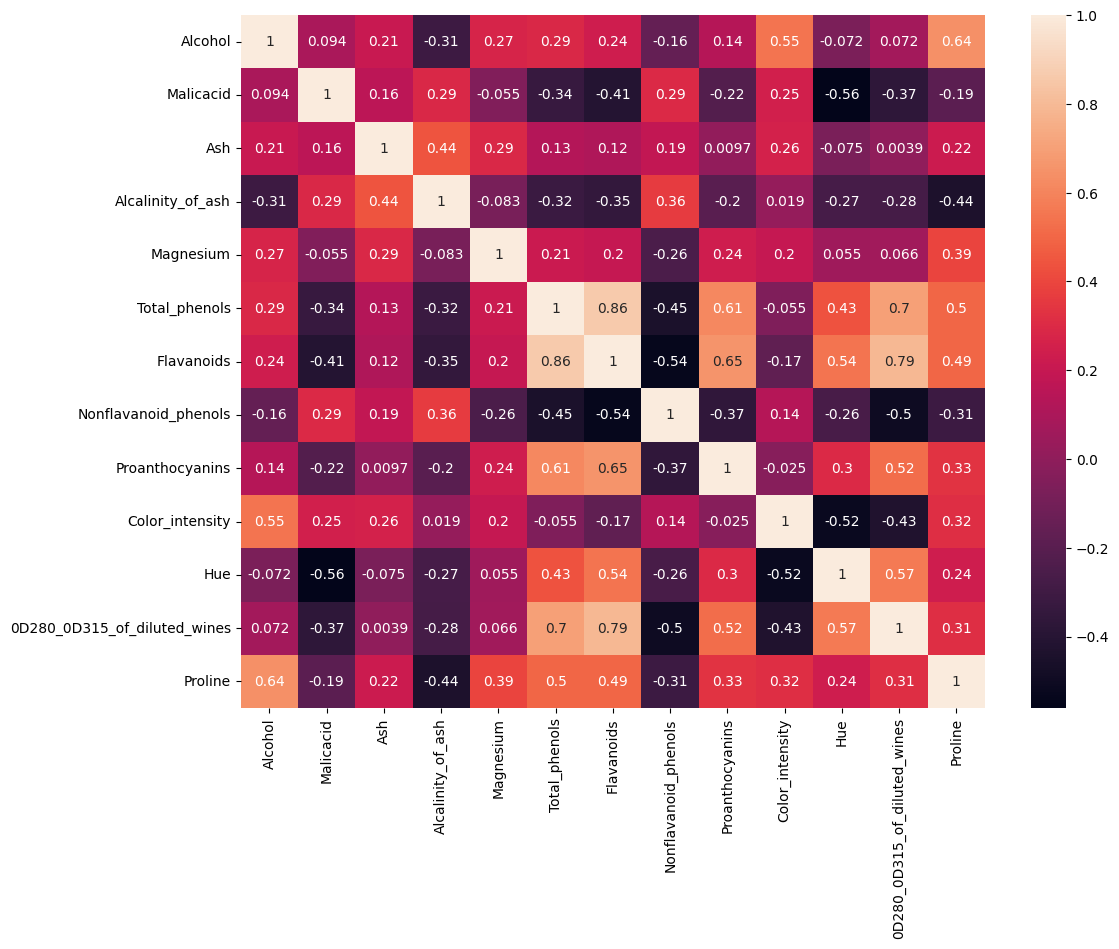

In [ ]:
fig=plt.figure(figsize=(12,9))
sns.heatmap(X.corr(), annot=True)

In [ ]:
pair = ('Total_phenols', 'Flavanoids')

## Task 2

<Axes: xlabel='Total_phenols', ylabel='Flavanoids'>

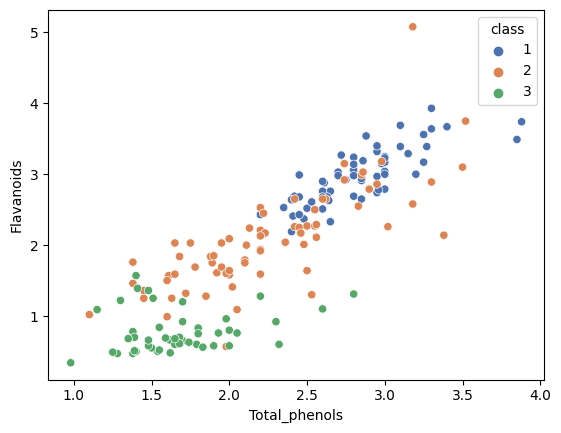

In [ ]:
sns.scatterplot(data=X, x=pair[0], y=pair[1], hue=y['class'], palette='deep')

## Задание 3

In [ ]:
model = LinearRegression()
model.fit(np.array(X[pair[0]]).reshape(-1,1), X[pair[1]])

LinearRegression()

In [ ]:
model.coef_, model.intercept_

(array([1.37984391]), -1.1376271584040634)

## Задание 4

In [ ]:
X.corr()[pair[0]][pair[1]]

0.8645635000951147

In [ ]:
R2 = r2_score(X[pair[1]], model.coef_ * X[pair[0]] + model.intercept_)
R2

0.7474700456967156

## Задание 5

In [ ]:
idx = np.random.randint(0, X.shape[0], 3)
idx

array([131, 167, 171])

In [ ]:
X.loc[idx,:]

,Alcohol,Malicacid,Ash,Alcalinity_of_ash,Magnesium,Total_phenols,Flavanoids,Nonflavanoid_phenols,Proanthocyanins,Color_intensity,Hue,0D280_0D315_of_diluted_wines,Proline
131,12.88,2.99,2.40,20.0,104,1.30,1.22,0.24,0.83,5.400000,0.74,1.42,530
167,12.82,3.37,2.30,19.5,88,1.48,0.66,0.40,0.97,10.260000,0.72,1.75,685
171,12.77,2.39,2.28,19.5,86,1.39,0.51,0.48,0.64,9.899999,0.57,1.63,470


In [ ]:
pred = model.predict(np.array(X.loc[idx,pair[0]]).reshape(-1,1))
pred

array([0.65616993, 0.90454183, 0.78035588])

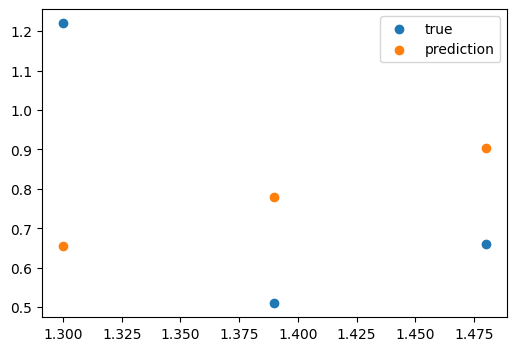

In [ ]:
fig, ax = plt.subplots(1,1,figsize=(6,4))
x0 = X.loc[idx, pair[0]]
true0 = X.loc[idx, pair[1]]
ax.scatter(x0, true0, label='true')
ax.scatter(x0, pred, label='prediction')
plt.legend()


Замечено явное смещение между предсказанием случайно выбранных объектов и истинных значений.

## Задание 6

In [ ]:
print('Point of view: DA')
print('\tmean relative error on chosen objects', sum(abs(true0 - pred/true0)))
print('\tmean relative error on the whole dataset',\
      sum(abs(X.loc[:,pair[1]] - model.predict(np.array(X.loc[:,pair[0]]).reshape(-1,1))/X.loc[:,pair[1]])))

true_all = X.loc[:,pair[1]]
pred_all = model.predict(np.array(X.loc[:,pair[0]]).reshape(-1,1))
print('Point of view: ML')
print('\tmean relative error on chosen objects', sum(abs(true0 - pred/pred)))
print('\tmean relative error on the whole dataset',\
      sum(abs((true_all - pred_all) / pred_all)))


Point of view: DA
	mean relative error on chosen objects 2.4127832987804307
	mean relative error on the whole dataset 255.53631188797232
Point of view: ML
	mean relative error on chosen objects 1.0499999999999998
	mean relative error on the whole dataset 45.04587128403354


## Задание 7

In [ ]:
r2_score(true_all, pred_all)

0.7474700456967156

In [ ]:
r2_score(pred_all, true_all)

0.6621537468195111

# Homework 2 (PCA/SVD)

In [ ]:
chosen = X.columns[[1,2,3,4,-1]]
chosen

Index(['Malicacid', 'Ash', 'Alcalinity_of_ash', 'Magnesium', 'Proline'], dtype='object')

In [ ]:
scaler0 = StandardScaler()
scaler1 = MinMaxScaler()
X_std = pd.DataFrame(data=scaler0.fit_transform(X.loc[:,chosen]), columns=chosen)
X_rng = pd.DataFrame(data=scaler1.fit_transform(X.loc[:,chosen]), columns=chosen)
X_std.shape

(178, 5)

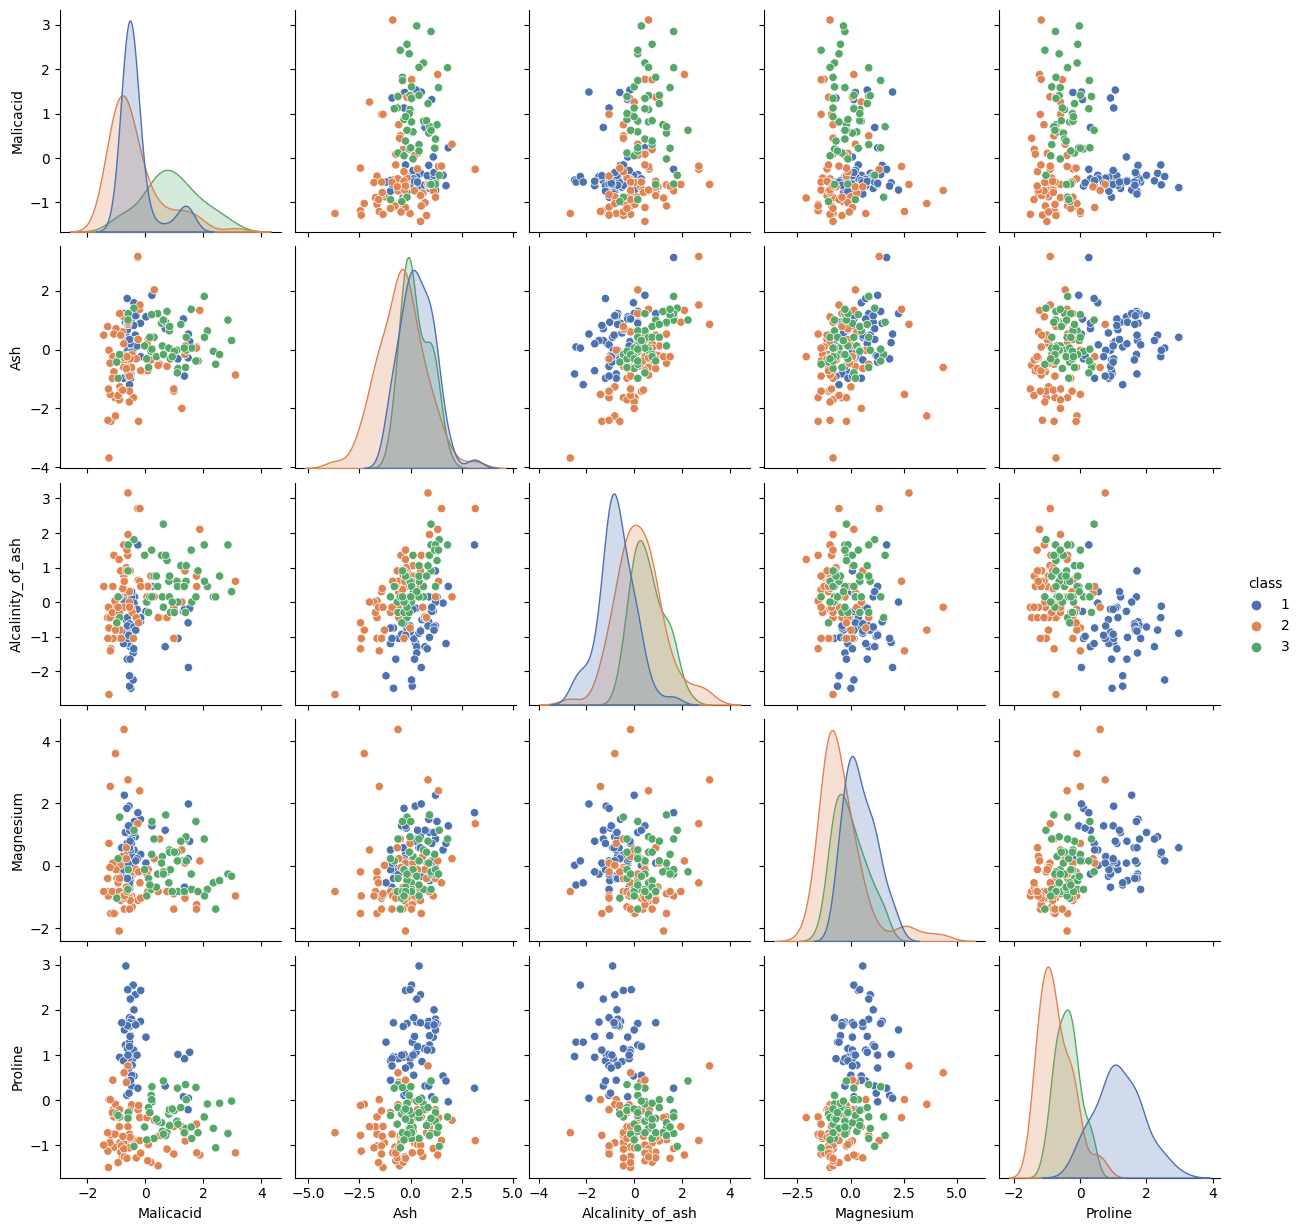

In [ ]:
sns.pairplot(X_std.merge(y, left_index=True, right_index=True), hue='class', palette='deep')

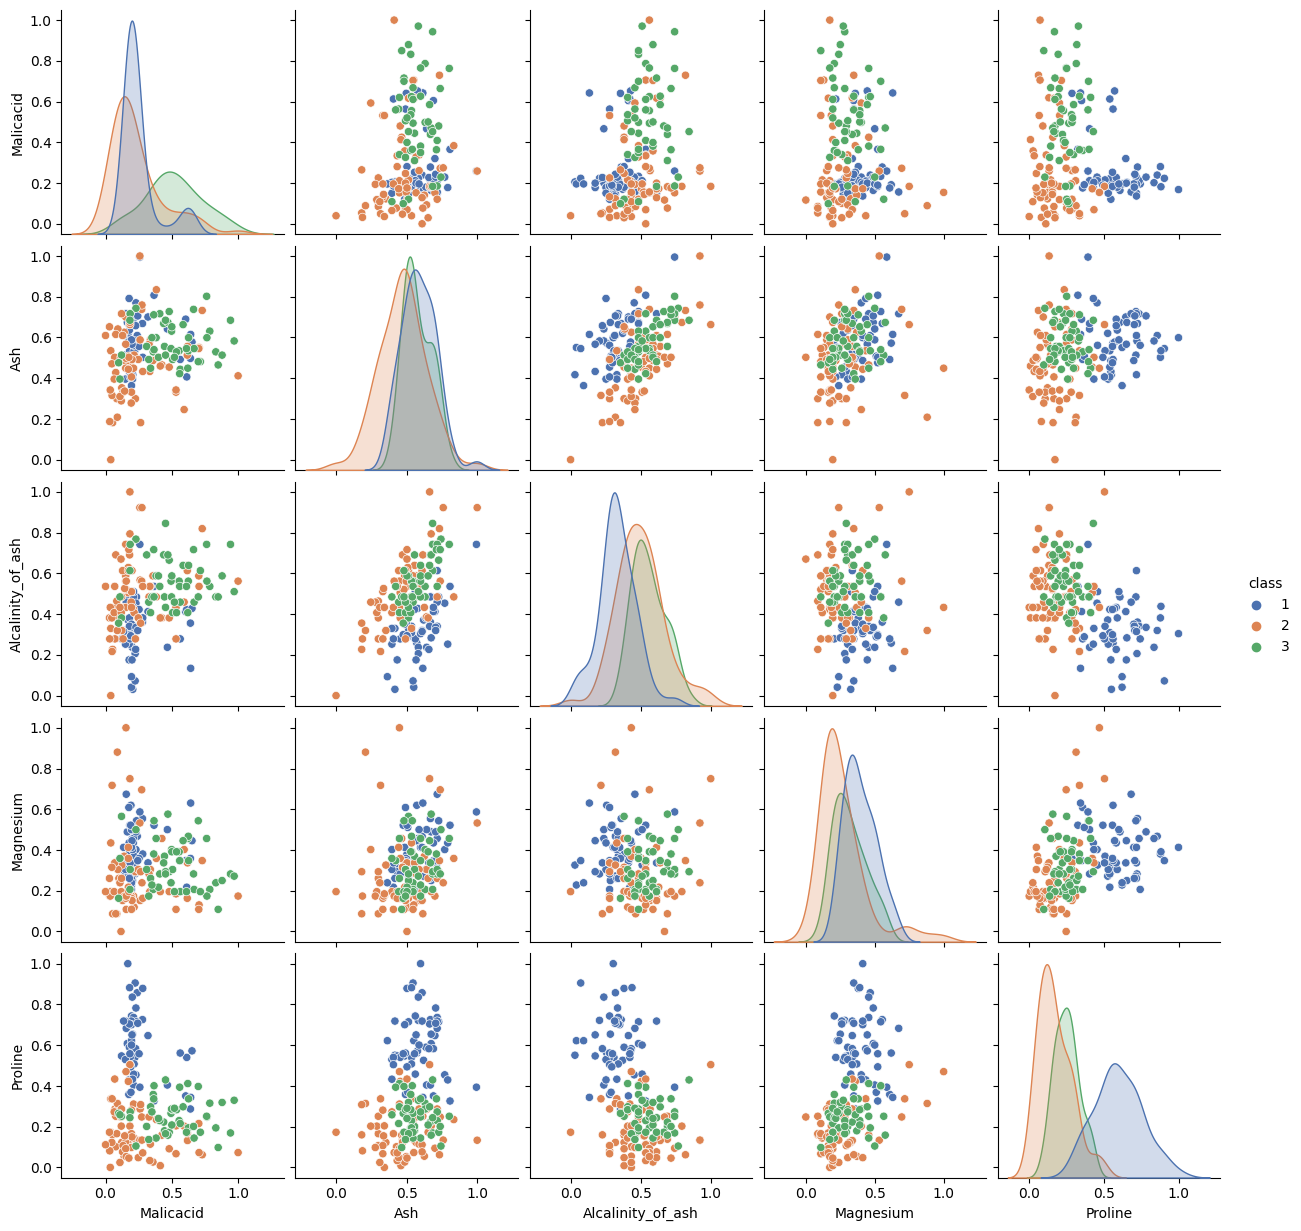

In [ ]:
sns.pairplot(X_rng.merge(y, left_index=True, right_index=True), hue='class', palette='deep')

z-scoring

In [ ]:
U, S, Vh = np.linalg.svd(X_std)
print("natural scaling: ", S)
print("percent scaling: ", S/S.sum())
print("2 main components")
simple_X = U[:,:2] @ np.diag(S[:2]) @ Vh[:2]

natural scaling:  [17.77170659 16.68674632 11.92519778 10.41441952  6.71181542]
percent scaling:  [0.27982583 0.2627425  0.18776916 0.16398108 0.10568143]
2 main components


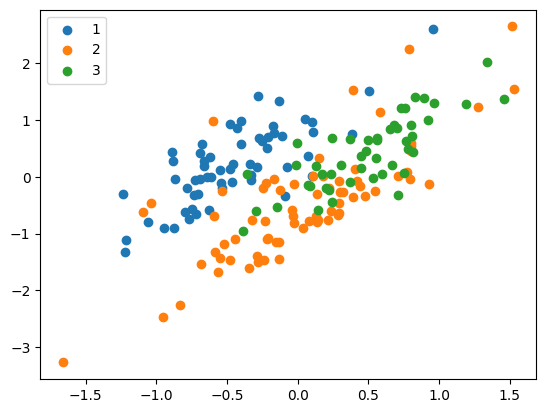

In [ ]:
for y0 in y['class'].unique():
  mask = y['class']==y0
  plt.scatter(simple_X[mask][:,0], simple_X[mask][:,1], label=y0)
plt.legend()

In [ ]:
U, S, Vh = np.linalg.svd(X_rng)
print("natural scaling: ", S)
print("percent scaling: ", S/S.sum())
print("2 main components")
simple_X = U[:,:2] @ np.diag(S[:2]) @ Vh[:2]

natural scaling:  [12.36734189  3.57250808  2.47007703  1.7222253   1.14602076]
percent scaling:  [0.58122198 0.16789543 0.11608501 0.08093859 0.05385898]
2 main components


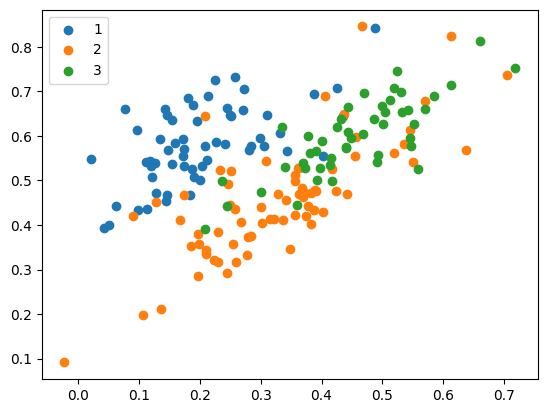

In [ ]:
for y0 in y['class'].unique():
  mask = y['class']==y0
  plt.scatter(simple_X[mask][:,0], simple_X[mask][:,1], label=y0)
plt.legend()

# Homework 3 (kNN)

In [ ]:
chosen3 = X.columns[[-4,-3,-2]]
chosen3

Index(['Color_intensity', 'Hue', '0D280_0D315_of_diluted_wines'], dtype='object')

In [ ]:
X_std = X.loc[:,chosen3].copy()

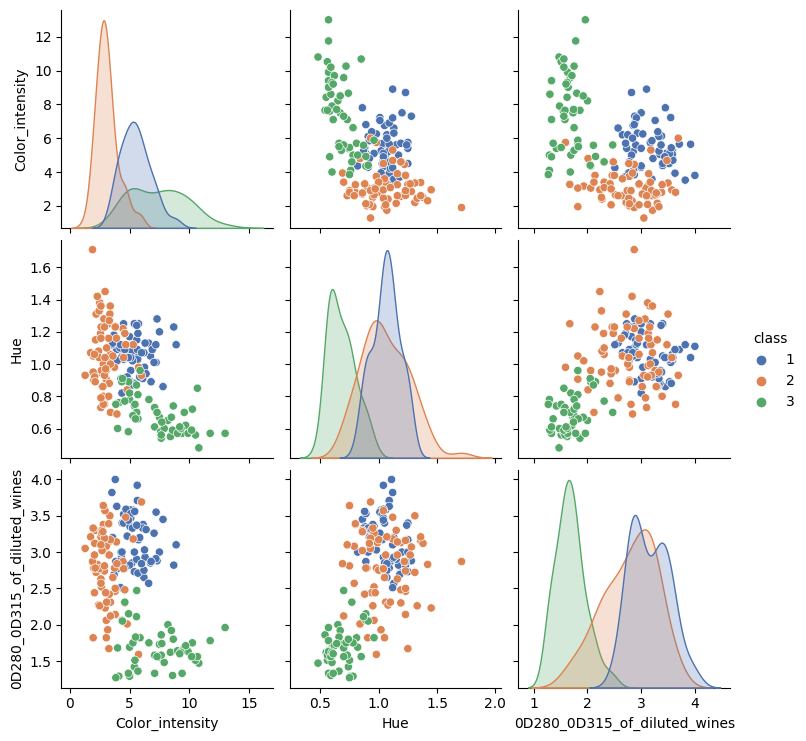

In [ ]:
sns.pairplot(X_std.merge(y, left_index=True, right_index=True), hue='class', palette='deep')

In [ ]:
rand_states = list(np.arange(0, 1000, 100, dtype=int))
scores = []
for r in rand_states:
    model = KMeans(n_clusters = 4, random_state = r, n_init=1)
    model.fit(X_std)
    scores.append(model.inertia_)
print(scores)
best = np.argsort(scores)[0]
print('best state: ', best)
model = KMeans(n_clusters = 4, random_state = rand_states[best], n_init=1)
model.fit(X_std)
y4 = model.labels_

[159.63394269260178, 166.13607448704101, 170.809804172207, 159.0068796729779, 161.28344148653224, 166.13607448704101, 166.13607448704101, 170.809804172207, 159.0068796729779, 170.809804172207]
best state:  3


In [ ]:
rand_states = list(np.arange(0, 1000, 100, dtype=int))
scores = []
for r in rand_states:
    model = KMeans(n_clusters = 7, random_state = r, n_init=1)
    model.fit(X_std)
    scores.append(model.inertia_)
print(scores)
best = np.argsort(scores)[0]
print('best state: ', best)
model = KMeans(n_clusters = 7, random_state = rand_states[best], n_init=1)
model.fit(X_std)
y7 = model.labels_

[87.83626538853287, 86.5134213262254, 86.65675117869603, 86.65675117869603, 92.58419633528771, 87.93936909252619, 86.65675117869603, 86.48124183695933, 87.95975051617823, 94.57926330577376]
best state:  7


In [ ]:
X_std['y4'] = y4
X_std['y7'] = y7
data4 = X_std.drop('y7', axis=1).groupby('y4').mean()
data4.loc['overall'] = X_std.drop(['y4', 'y7'], axis=1).mean()
data4

,Color_intensity,Hue,0D280_0D315_of_diluted_wines
y4,,,
0,9.754000,0.674000,1.768000
1,5.094194,0.968710,2.723065
2,2.923429,1.057086,2.823429
3,7.106923,0.880385,2.425000
overall,5.058090,0.957449,2.611685


In [ ]:
data4.sub(data4.loc['overall'], axis=1).div(data4.loc['overall'], axis=1).drop(['overall'], axis=0) * 100

,Color_intensity,Hue,0D280_0D315_of_diluted_wines
y4,,,
0,92.839593,-29.604638,-32.304251
1,0.713781,1.176066,4.264645
2,-42.202914,10.406427,8.107530
3,40.506065,-8.048970,-7.148081


In [ ]:
data7 = X_std.drop('y4', axis=1).groupby('y7').mean()
data7.loc['overall'] = X_std.drop(['y4', 'y7'], axis=1).mean()
data7

,Color_intensity,Hue,0D280_0D315_of_diluted_wines
y7,,,
0,6.626190,1.018571,3.003810
1,3.506176,1.077824,2.750882
2,10.330000,0.616154,1.627692
3,5.016364,0.799545,1.777727
4,5.023529,1.065294,3.210882
5,8.029412,0.691176,1.800588
6,2.433243,1.049189,2.924865
overall,5.058090,0.957449,2.611685


In [ ]:
data7.sub(data7.loc['overall'], axis=1).div(data7.loc['overall'], axis=1).drop(['overall'], axis=0) * 100

,Color_intensity,Hue,0D280_0D315_of_diluted_wines
y7,,,
0,31.001833,6.383835,15.014218
1,-30.681808,12.572371,5.329775
2,104.227291,-35.646331,-37.676555
3,-0.824941,-16.492149,-31.931799
4,-0.683271,11.263747,22.942923
5,58.743952,-27.810656,-31.056465
6,-51.894029,9.581681,11.991470


# Homework 4 (Contingency Table)

In [ ]:
chosen4 = X.columns[[1,2]]
chosen4

Index(['Malicacid', 'Ash'], dtype='object')

In [ ]:
hister = KBinsDiscretizer(n_bins=[4,4], encode='ordinal')
pretable = pd.DataFrame(data=hister.fit_transform(X[chosen4]), columns=chosen4)
pretable = pretable.astype(int)
pretable

,Malicacid,Ash
0,1,2
1,1,0
2,2,3
3,2,2
4,2,3
...,...,...
173,3,2
174,3,2
175,3,1
176,2,2


In [ ]:
tb = pd.crosstab(pretable['Malicacid'], pretable['Ash'], margins=True)
tb

Ash,0,1,2,3,All
Malicacid,,,,,
0,19,10,9,7,45
1,11,12,11,10,44
2,5,9,12,18,44
3,8,12,15,10,45
All,43,43,47,45,178


# Homework 5 (Boostrap)

In [ ]:
#X_std = X_std.drop('y4', axis=1)
res = bootstrap((X_std.drop('y7', axis=1),), np.mean, confidence_level=0.95)

4.7298106701215135 < Grand_Mean(Color_intensity) < 5.409661725264525
0.9244770054943702 < Grand_Mean(Hue) < 0.9917904804046087
2.5066468321452016 < Grand_Mean(0D280_0D315_of_diluted_wines) < 2.713051408875826


In [ ]:
def piv_TI(arr):
    mmr = arr.mean()
    smr=arr.std()
    lbp=mmr-1.96*smr
    rbp=mmr+1.96*smr
    return lbp, rbp

def npiv_TI(arr):
    N = arr.shape[0]
    lbp = np.sort(arr)[int(N * 2.5 / 100)]
    rbp = np.sort(arr)[int(N * 97.5 / 100)]
    return lbp, rbp

for i, arr in enumerate(res.bootstrap_distribution):
    #pivotal
    l, h = piv_TI(arr)
    print('pivotal: {0:3f} < {1} < {2:3f}'.format(l, X.columns[i], h))
    #non-pivotal
    l, h = npiv_TI(arr)
    print('non-piv: {0:3f} < {1} < {2:3f}'.format(l, X.columns[i], h))

pivotal: 4.720504 < Alcohol < 5.396745
non-piv: 4.725562 < Alcohol < 5.400056
pivotal: 0.924153 < Malicacid < 0.991038
non-piv: 0.924360 < Malicacid < 0.991742
pivotal: 2.508601 < Ash < 2.716054
non-piv: 2.509438 < Ash < 2.716067


In [ ]:
clusts = 2,6
res1 = bootstrap((X_std[X_std.y7 == clusts[0]].drop('y7', axis=1),), np.mean, confidence_level=0.95).bootstrap_distribution
res2 = bootstrap((X_std[X_std.y7 == clusts[1]].drop('y7', axis=1),), np.mean, confidence_level=0.95).bootstrap_distribution
res_diff = res1-res2
for i in range(res_diff.shape[0]):
    print('pivotal', X_std.columns[i], 'm1-m2 =', piv_TI(res_diff[i]))
    print('non-piv', X_std.columns[i], 'm1-m2 =', npiv_TI(res_diff[i]))

pivotal Color_intensity m1-m2 = (7.3268406994955315, 8.461148277211702)
non-piv Color_intensity m1-m2 = (7.3774218835758845, 8.50887726195426)
pivotal Hue m1-m2 = (-0.5182754679180206, -0.34742231183916483)
non-piv Hue m1-m2 = (-0.5186486486486486, -0.3465072765072763)
pivotal 0D280_0D315_of_diluted_wines m1-m2 = (-1.4453226621536484, -1.1477172073218633)
non-piv 0D280_0D315_of_diluted_wines m1-m2 = (-1.4438877338877332, -1.1468191268191268)


In [ ]:
clust = 4
res_grand=res.bootstrap_distribution
res1 = bootstrap((X_std[X_std.y7 == clust].drop('y7', axis=1),), np.mean, confidence_level=0.95).bootstrap_distribution
res_diff = res1-res_grand
for i in range(res_diff.shape[0]):
    print('pivotal', X_std.columns[i], 'm1-m2 =', piv_TI(res_diff[i]))
    print('non-piv', X_std.columns[i], 'm1-m2 =', npiv_TI(res_diff[i]))

pivotal Color_intensity m1-m2 = (-0.40693108778260756, 0.3371132982918279)
non-piv Color_intensity m1-m2 = (-0.4088532604097832, 0.3293192389292816)
pivotal Hue m1-m2 = (0.054641448336835444, 0.1611649152473092)
non-piv Hue m1-m2 = (0.05332055518836731, 0.16021612690019804)
pivotal 0D280_0D315_of_diluted_wines m1-m2 = (0.4425211620658619, 0.7532364969782995)
non-piv 0D280_0D315_of_diluted_wines m1-m2 = (0.4396530072703242, 0.7518803701255781)


0      False
1      False
2      False
3      False
4      False
       ...  
173    False
174    False
175    False
176    False
177    False
Name: y7, Length: 178, dtype: bool